In [380]:
import nltk
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib
import plotly as plt
import re
import collections
import math
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import tensorflow as tf


In [381]:
import os 
# list the files in directory 
lis1 = os.listdir('C:\\Users'
                 '\\Lenovo\\Desktop\\gis\\emotions\\sad') 
lis2 = os.listdir('C:\\Users'
                 '\\Lenovo\\Desktop\\gis\\emotions\\happy')
lis3 = os.listdir('C:\\Users'
                 '\\Lenovo\\Desktop\\gis\\emotions\\angry')
lis4 = os.listdir('C:\\Users'
                 '\\Lenovo\\Desktop\\gis\\emotions\\neutral')
print(lis1) 

L=[lis1,lis2,lis3,lis4]


['0.txt', '1.txt', '10.txt', '100.txt', '101.txt', '102.txt', '103.txt', '11.txt', '12.txt', '13.txt', '14.txt', '15.txt', '16.txt', '17.txt', '18.txt', '19.txt', '2.txt', '20.txt', '21.txt', '22.txt', '23.txt', '24.txt', '25.txt', '26.txt', '27.txt', '28.txt', '29.txt', '3.txt', '30.txt', '31.txt', '32.txt', '33.txt', '34.txt', '35.txt', '36.txt', '37.txt', '38.txt', '39.txt', '4.txt', '40.txt', '41.txt', '42.txt', '43.txt', '44.txt', '45.txt', '46.txt', '47.txt', '48.txt', '49.txt', '5.txt', '50.txt', '51.txt', '52.txt', '53.txt', '54.txt', '55.txt', '56.txt', '57.txt', '58.txt', '59.txt', '6.txt', '60.txt', '61.txt', '62.txt', '63.txt', '64.txt', '65.txt', '66.txt', '67.txt', '68.txt', '69.txt', '7.txt', '70.txt', '71.txt', '72.txt', '73.txt', '74.txt', '75.txt', '76.txt', '77.txt', '78.txt', '79.txt', '8.txt', '80.txt', '81.txt', '82.txt', '83.txt', '84.txt', '85.txt', '86.txt', '87.txt', '88.txt', '89.txt', '9.txt', '90.txt', '91.txt', '92.txt', '93.txt', '94.txt', '95.txt', '96.t

In [382]:
#d1 = pd.concat((pd.read_csv(f) for f in lis1))
import os
import glob
df=pd.DataFrame()

In [383]:
indir = "C:\\Users\\Lenovo\\Desktop\gis\\emotions\\sad"
outfile  = "C:\\Users\\Lenovo\\Desktop\\gis\\emotions\\output.csv"
os.chdir(indir)
filelist = glob.glob("*.txt")
dfList = []
l2=[]
df=pd.DataFrame()
df1=pd.DataFrame()
colnames = ["text"]
data=[]
def csv_file(lis):
    l2=[]
    for filename in lis:
        #print(filename)
        df = pd.read_csv(filename)#,delim_whitespace=False)
        l1=list(df)
        l2.append(l1)
        #print(l1)
        #df1=pd.concat(df)
        #print(df)
        dfList.append(df)
    #print(dfList)
    #print(l2)
    #df1=pd.DataFrame(dfList)
    data=[]
    for i in l2:
        data.append(i[0])
    #print(data)
    return data

In [384]:
indir = "C:\\Users\\Lenovo\\Desktop\gis\\emotions\\sad"
#outfile  = "C:\\Users\\Lenovo\\Desktop\\gis\\emotions\\output.csv"
os.chdir(indir)
d1=csv_file(lis1)
#for i in d1:
len(d1)    
    

104

In [385]:
indir = "C:\\Users\\Lenovo\\Desktop\gis\\emotions\\happy"
#outfile  = "C:\\Users\\Lenovo\\Desktop\\gis\\emotions\\output.csv"
os.chdir(indir)
d2=csv_file(lis2)
len(d2)

151

In [386]:
indir = "C:\\Users\\Lenovo\\Desktop\gis\\emotions\\angry"
#outfile  = "C:\\Users\\Lenovo\\Desktop\\gis\\emotions\\output.csv"
os.chdir(indir)
d3=csv_file(lis3)

In [387]:
indir = "C:\\Users\\Lenovo\\Desktop\gis\\emotions\\neutral"
#outfile  = "C:\\Users\\Lenovo\\Desktop\\gis\\emotions\\output.csv"
os.chdir(indir)
d4=csv_file(lis4)

In [388]:
e1 = ["sad"] * len(d1)
e2 = ["happy"] * len(d2)
e3 = ["angry"] * len(d3)
e4 = ["neutral"] * len(d4)
emo=[e1,e2,e3,e4]
text=[d1,d2,d3,d4]
len(d1)

104

In [389]:
td=[]
ed=[]
for i in range(0,len(emo)):
    for j in range(0,len(emo[i])):
        td.append(text[i][j])
        ed.append(emo[i][j])
                
td=[td]*1
ed=[ed]*1

td1=[]
ed1=[]
for i in range(0,len(td)):
    for j in range(0,len(td[i])):
        td1.append(td[i][j])
        ed1.append(ed[i][j])
        

In [390]:
data = {'Emotion':ed1,'Text':td1}

df=pd.DataFrame(data)

In [391]:
df = df.sample(frac=1).reset_index(drop=True)
df

,Emotion,Text
0,angry,कभी तो समझ जा एक बार मे
1,angry,तू बस अपना पैक्स डिटेल्स दे नालायक
2,angry,मुझे कुछ समझ में नहीं आ रहा है
3,happy,बहुत खूब
4,happy,अरे वाह क्या सर्विस है
...,...,...
508,happy,मदद करने के लिए शुक्रिया
509,angry,कहाँ से होगा बे तेरा रिचार्ज
510,happy,मेरा ट्रैन टिकट बुक हो गया वाओ ! !
511,happy,बहुत मज़ा आया


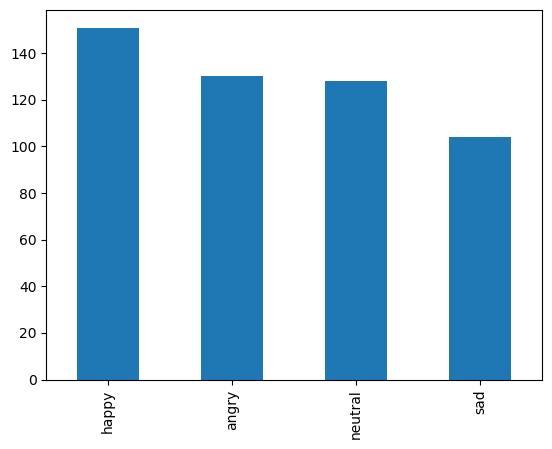

In [392]:
df.Emotion.value_counts().plot.bar()

In [393]:
#tokenization of words in each sentence
input_sentences = [text.split(" ") for text in df["Text"].values.tolist()]
labels = df["Emotion"].values.tolist()
input_sentences

[['कभी', 'तो', 'समझ', 'जा', 'एक', 'बार', 'मे', ''],
 ['तू', 'बस', 'अपना', 'पैक्स', 'डिटेल्स', 'दे', 'नालायक', ''],
 ['मुझे', 'कुछ', 'समझ', 'में', 'नहीं', 'आ', 'रहा', 'है', ''],
 ['बहुत', 'खूब', ''],
 ['अरे', 'वाह', 'क्या', 'सर्विस', 'है', ''],
 ['मेरी', 'ट्रैन', 'का', 'स्टेटस', 'पता', 'करो', ''],
 ['मेरा', 'होटल', 'में', 'स्टे', 'अच्छा', 'नहीं', 'था', ''],
 ['इतना',
  'अच्छा',
  'सर्विस',
  'दिया',
  'तो',
  'ख़ुशी',
  'से',
  'मै',
  'और',
  'पैसे',
  'दे',
  'दूँ',
  ''],
 ['क्या', 'बेकार', 'की', 'बातें', 'कर', 'रहे', 'हो', ''],
 ['वाह', 'भाई', 'क्या', 'बढ़िया', 'डील', 'मिली', 'है', ''],
 ['मै', 'पेमेंट', 'कैसे', 'करू', ''],
 ['मैं', 'बिलकुल', 'संतुष्ट', 'हूँ', 'इनके', 'सर्विस', 'से', ''],
 ['तुम्हारे', 'काम', 'की', 'दाद', 'देता', 'हूँ'],
 ['कैब', 'आने', 'में', 'और', 'कितना', 'टाइम', 'है', ''],
 ['अच्छा', 'काम', 'किया', 'भाई', ''],
 ['कैब', 'वाले', 'ने', 'मुझसे', 'ढंग', 'से', 'बात', 'नहीं', 'की', ''],
 ['गज़ब', 'का', 'होटल', 'था', ''],
 ['आये',
  'होये',
  '!',
  '!',
  '!',
  'आज',
  

In [394]:
#Creating Vocabulary (word index)
# Initialize word2id and label2id dictionaries that will be used to encode words and labels
word2id = dict()
label2id = dict()

max_words = 0 # maximum number of words in a sentence

# Construction of word2id dict
for sentence in input_sentences:
    for word in sentence:
        # Add words to word2id dict if not exist
        if word not in word2id:
            word2id[word] = len(word2id)
    # If length of the sentence is greater than max_words, update max_words
    if len(sentence) > max_words:
        max_words = len(sentence)
    
# Construction of label2id and id2label dicts
label2id = {j: i for i, j in enumerate(set(labels))}
id2label = {v: k for k, v in label2id.items()}
id2label
label2id

{'sad': 0, 'happy': 1, 'neutral': 2, 'angry': 3}

In [395]:
#Encoding samples with corresponding integer values
#import keras
import keras

In [406]:
# Encode input words and labels
X=[]
Y=[]

X = [[word2id[word] for word in sentence] for sentence in input_sentences]
    
Y = [label2id[label] for label in labels]
X


[[0, 1, 2, 3, 4, 5, 6, 7],
 [8, 9, 10, 11, 12, 13, 14, 7],
 [15, 16, 2, 17, 18, 19, 20, 21, 7],
 [22, 23, 7],
 [24, 25, 26, 27, 21, 7],
 [28, 29, 30, 31, 32, 33, 7],
 [34, 35, 17, 36, 37, 18, 38, 7],
 [39, 37, 27, 40, 1, 41, 42, 43, 44, 45, 13, 46, 7],
 [26, 47, 48, 49, 50, 51, 52, 7],
 [25, 53, 26, 54, 55, 56, 21, 7],
 [43, 57, 58, 59, 7],
 [60, 61, 62, 63, 64, 27, 42, 7],
 [65, 66, 48, 67, 68, 63],
 [69, 70, 17, 44, 71, 72, 21, 7],
 [37, 66, 73, 53, 7],
 [69, 74, 75, 76, 77, 42, 78, 18, 48, 7],
 [79, 30, 35, 38, 7],
 [80, 81, 82, 82, 82, 83, 1, 84, 85, 86, 87, 53, 7],
 [88, 27, 42, 89, 90, 21],
 [91, 92, 93, 18, 94],
 [95, 96, 97, 7],
 [22, 98, 63, 43, 65, 99],
 [100, 101, 30, 102, 39, 103, 104, 50, 105, 21, 5, 5, 7],
 [106, 7],
 [35, 28, 107, 108, 109, 42, 18, 38, 7],
 [15, 22, 110, 19, 20, 21, 7],
 [22, 37, 69, 111, 38, 7],
 [69, 74, 75, 76, 112, 48, 7],
 [10, 113, 114, 115, 116, 7],
 [4, 117, 78, 118, 5, 119, 7],
 [24, 120, 121, 122, 123, 124, 125, 125, 126, 52, 127, 128],
 [129, 

In [403]:
# Apply Padding to X
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, max_words)

# Convert Y to numpy array
Y = keras.utils.to_categorical(Y, num_classes=len(label2id), dtype='float32')

# Print shapes
print("Shape of X: {}".format(X.shape))
print("Shape of Y: {}".format(Y.shape))
X

Shape of X: (513, 13)
Shape of Y: (513, 4, 4)


array([[  0,   0,   0, ...,   5,   6,   7],
       [  0,   0,   0, ...,  13,  14,   7],
       [  0,   0,   0, ...,  20,  21,   7],
       ...,
       [  0,   0,  34, ...,  82,   7,   7],
       [  0,   0,   0, ..., 358, 399,   7],
       [  0,   0,   0, ..., 117,  50, 643]])

In [405]:
Y

array([[[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]],

       ...,

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]]], dtype=float32)

In [399]:
embedding_dim = 100 # The dimension of word embeddings

# Define input tensor
sequence_input = keras.Input(shape=(max_words,), dtype='int32')

# Word embedding layer
embedded_inputs =keras.layers.Embedding(len(word2id) + 1,
                                        embedding_dim,
                                        input_length=max_words)(sequence_input)

# Apply dropout to prevent overfitting
embedded_inputs = keras.layers.Dropout(0.2)(embedded_inputs)

# Apply Bidirectional LSTM over embedded inputs
lstm_outs = keras.layers.wrappers.Bidirectional(
    keras.layers.LSTM(embedding_dim, return_sequences=True)
)(embedded_inputs)

# Apply dropout to LSTM outputs to prevent overfitting
lstm_outs = keras.layers.Dropout(0.2)(lstm_outs)

# Attention Mechanism - Generate attention vectors
input_dim = int(lstm_outs.shape[2])
permuted_inputs = keras.layers.Permute((2, 1))(lstm_outs)
attention_vector = keras.layers.TimeDistributed(keras.layers.Dense(1))(lstm_outs)
attention_vector = keras.layers.Reshape((max_words,))(attention_vector)
attention_vector = keras.layers.Activation('softmax', name='attention_vec')(attention_vector)
attention_output = keras.layers.Dot(axes=1)([lstm_outs, attention_vector])

# Last layer: fully connected with softmax activation
fc = keras.layers.Dense(embedding_dim, activation='relu')(attention_output)
output = keras.layers.Dense(len(label2id), activation='softmax')(fc)

# Finally building model
model = keras.Model(inputs=[sequence_input], outputs=output)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

# Print model summary
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 13)           0                                            
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 13, 100)      69100       input_10[0][0]                   
__________________________________________________________________________________________________
dropout_19 (Dropout)            (None, 13, 100)      0           embedding_10[0][0]               
__________________________________________________________________________________________________
bidirectional_10 (Bidirectional (None, 13, 200)      160800      dropout_19[0][0]                 
___________________________________________________________________________________________

In [400]:
# Train model 10 iterations

model.fit(X, Y, epochs=100, batch_size=64, validation_split=0.1, shuffle=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 461 samples, validate on 52 samples
Epoch 1/100
461/461 [==============================] - 1s 3ms/step - loss: 1.3834 - accuracy: 0.2928 - val_loss: 1.3759 - val_accuracy: 0.3269
Epoch 2/100
461/461 [==============================] - 0s 508us/step - loss: 1.3682 - accuracy: 0.2950 - val_loss: 1.3633 - val_accuracy: 0.3269
Epoch 3/100
461/461 [==============================] - 0s 539us/step - loss: 1.3393 - accuracy: 0.3514 - val_loss: 1.3322 - val_accuracy: 0.4231
Epoch 4/100
461/461 [==============================] - 0s 510us/step - loss: 1.2331 - accuracy: 0.5119 - val_loss: 1.2271 - val_accuracy: 0.4808
Epoch 5/100
461/461 [==============================] - 0s 500us/step - loss: 1.0355 - accuracy: 0.5423 - val_loss: 1.1982 - val_accuracy: 0.4808
Epoch 6/100
461/461 [==============================] - 0s 532us/step - loss: 0.8666 - accuracy: 0.6074 - val_loss: 1.1901 - val_accuracy: 0.5192
Epoch 7/100
461/461 [==============================] - 0s 550us/step - loss: 0.6943 - a

461/461 [==============================] - 0s 1ms/step - loss: 1.0194e-04 - accuracy: 1.0000 - val_loss: 2.8418 - val_accuracy: 0.6923
Epoch 57/100
461/461 [==============================] - 0s 952us/step - loss: 8.2447e-05 - accuracy: 1.0000 - val_loss: 2.8492 - val_accuracy: 0.6923
Epoch 58/100
461/461 [==============================] - 0s 578us/step - loss: 3.1261e-04 - accuracy: 1.0000 - val_loss: 2.8482 - val_accuracy: 0.6923
Epoch 59/100
461/461 [==============================] - 0s 517us/step - loss: 3.9244e-04 - accuracy: 1.0000 - val_loss: 2.8615 - val_accuracy: 0.6538
Epoch 60/100
461/461 [==============================] - 0s 519us/step - loss: 4.3219e-04 - accuracy: 1.0000 - val_loss: 2.8629 - val_accuracy: 0.6923
Epoch 61/100
461/461 [==============================] - 0s 573us/step - loss: 6.7550e-05 - accuracy: 1.0000 - val_loss: 2.8668 - val_accuracy: 0.6923
Epoch 62/100
461/461 [==============================] - 0s 539us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss:

In [401]:
# Re-create the model to get attention vectors as well as label prediction
model_with_attentions = keras.Model(inputs=model.input,
                                    outputs=[model.output, 
                                             model.get_layer('attention_vec').output])

काफी ठण्ड है 
[[269, 270, 21, 7]]


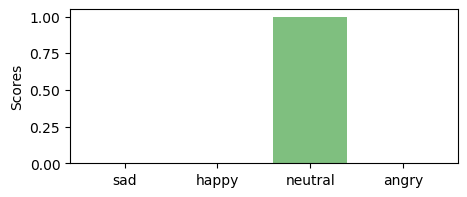

In [409]:
import random
import math

# Select random samples to illustrate
sample_text = random.choice(df["Text"].values.tolist())

print(sample_text)

# Encode samples
tokenized_sample = sample_text.split(" ")
encoded_samples = [[word2id[word] for word in tokenized_sample]]
print(encoded_samples)
# Padding
encoded_samples = keras.preprocessing.sequence.pad_sequences(encoded_samples, maxlen=max_words)

# Make predictions
label_probs, attentions = model_with_attentions.predict(encoded_samples)
label_probs = {id2label[_id]: prob for (label, _id), prob in zip(label2id.items(),label_probs[0])}

# Get word attentions using attenion vector
token_attention_dic = {}
max_score = 0.0
min_score = 0.0
for token, attention_score in zip(tokenized_sample, attentions[0][-len(tokenized_sample):]):
    token_attention_dic[token] = math.sqrt(attention_score)


# VISUALIZATION
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
    
def attention2color(attention_score):
    r = 255 - int(attention_score * 255)
    color = rgb_to_hex((255, r, r))
    return str(color)
    
# Build HTML String to viualize attentions
html_text = "<hr><p style='font-size: large'><b>Text:  </b>"
for token, attention in token_attention_dic.items():
    html_text += "<span style='background-color:{};'>{} <span> ".format(attention2color(attention),
                                                                        token)
html_text += "</p>"
# Display text enriched with attention scores 
display(HTML(html_text))

# PLOT EMOTION SCORES
emotions = [label for label, _ in label_probs.items()]
scores = [score for _, score in label_probs.items()]
plt.figure(figsize=(5,2))
plt.bar(np.arange(len(emotions)), scores, align='center', alpha=0.5, color=['black', 'red', 'green', 'blue', 'cyan', "purple"])
plt.xticks(np.arange(len(emotions)), emotions)
plt.ylabel('Scores')
plt.show()